# 数据可视化作业题目

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from __future__ import division, print_function 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# 在notebook中显示绘图结果
%matplotlib inline

In [3]:
matplotlib.rc('figure', figsize = (8, 4)) # 设置图片尺寸 8 x 4
matplotlib.rc('font', size = 12) # 设置字体14
matplotlib.rc('axes', grid = False) # 设置不显示网格
matplotlib.rc('axes', facecolor = 'white') # 设置背景颜色为白色

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [40]:
data = sns.load_dataset("flights")
data
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


* Seaborn 部分

In [41]:
sns.set() # 恢复默认设置

<Axes: xlabel='year', ylabel='passengers'>

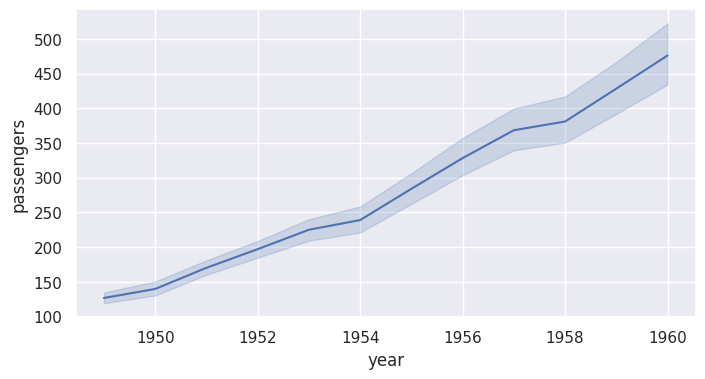

In [42]:
sns.lineplot(x = 'year', y = 'passengers', data = data)

<Axes: xlabel='month', ylabel='passengers'>

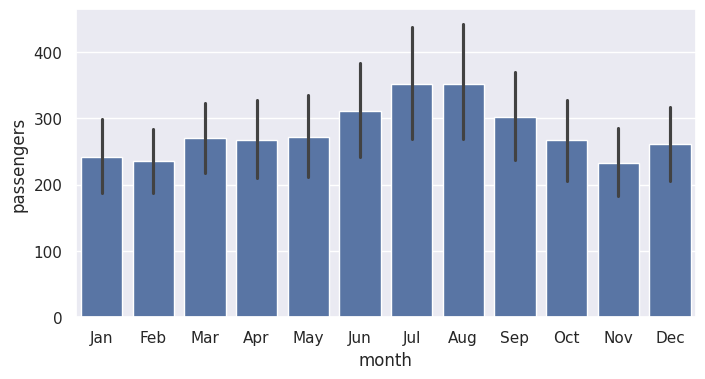

In [43]:
sns.barplot(x = "month", y = "passengers", data = data) 

* Matplotlib 部分

In [139]:
def lineploty(x_data, x_label, y_data, y_label, y_color, title):
    _, ax = plt.subplots()
    ax.plot(x_data, y_data, color = y_color)
    arr = x_data
    # 添加标题和坐标说明
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks(arr)
    
mean_year = data[['year', 'passengers']].groupby('year').agg(['sum'])
mean_year.columns = mean_year.columns.droplevel() 

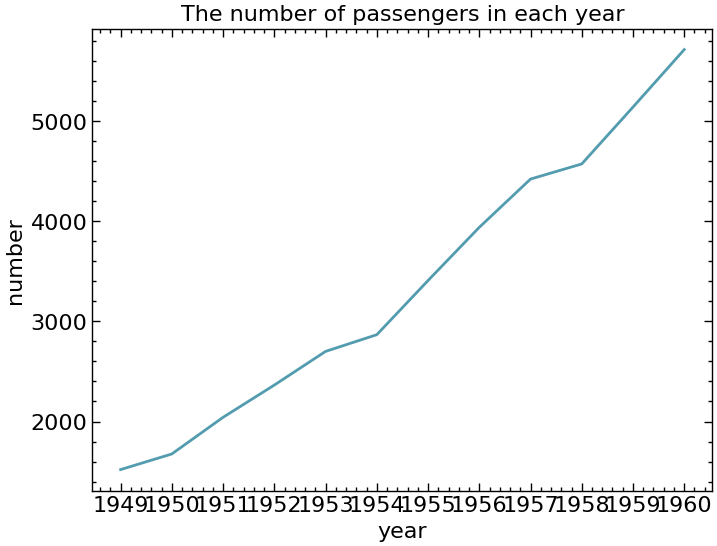

In [140]:
lineploty(x_data = mean_year.index.values, x_label = 'year', y_data = mean_year['sum'], y_label = 'number', y_color = '#539caf' , title = 'The number of passengers in each year')

In [141]:
def barplot(x_data, x_label, y_data, y_label, y_color, title):
    _, ax = plt.subplots()
    ax.bar(x_data, y_data, color = y_color, align = 'center')
    arr = x_data
    # 添加标题和坐标说明
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks(arr)
    
mean_mon = data[['month', 'passengers']].groupby('month').agg(['sum'])
mean_mon.columns = mean_mon.columns.droplevel() 

/tmp/ipykernel_85/1205275738.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_mon = data[['month', 'passengers']].groupby('month').agg(['sum'])


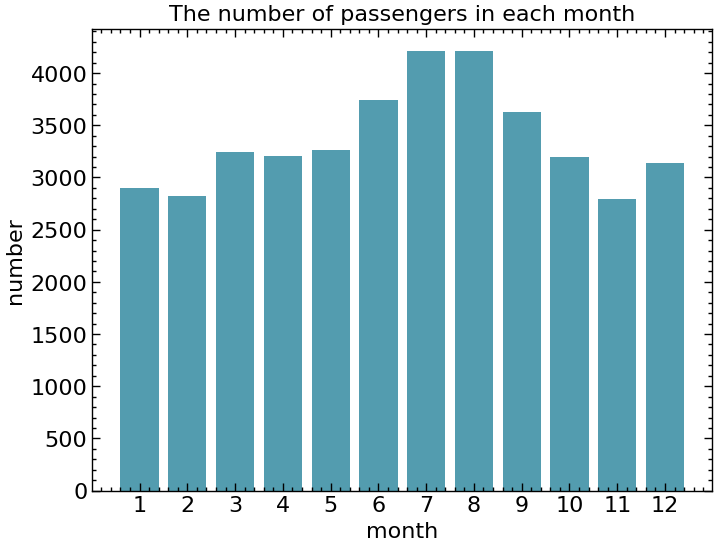

In [142]:
barplot(x_data = [1,2,3,4,5,6,7,8,9,10,11,12], x_label = 'month', y_data = mean_mon['sum'], y_label = 'number', y_color = '#539caf', title = 'The number of passengers in each month')

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [45]:
data = sns.load_dataset("iris")
data
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


* Seaborn 部分

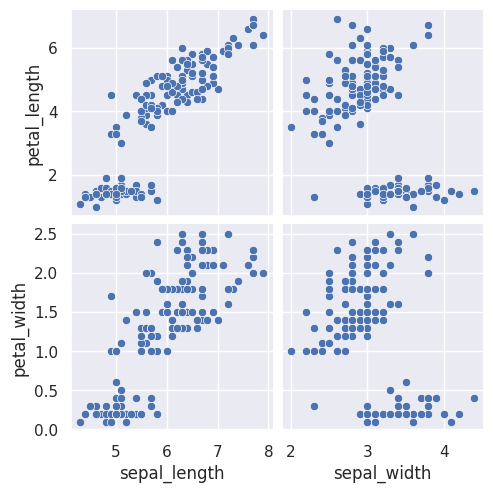

In [46]:
sns.pairplot(data,x_vars=["sepal_length","sepal_width"],y_vars=["petal_length","petal_width"]) 

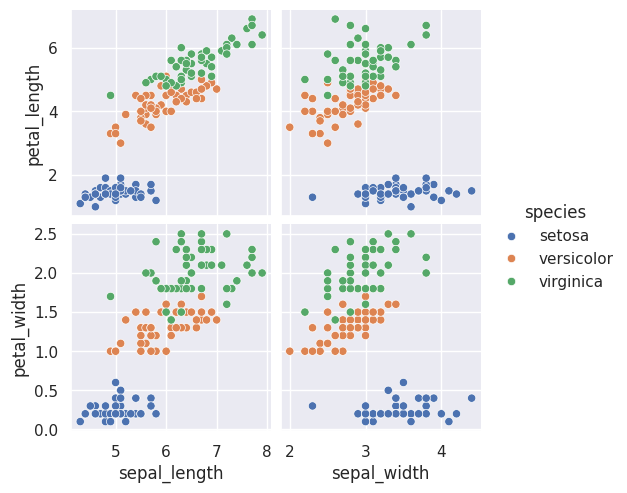

In [47]:
sns.pairplot(data,x_vars=["sepal_length","sepal_width"],y_vars=["petal_length","petal_width"], hue = 'species') 

<Axes: >

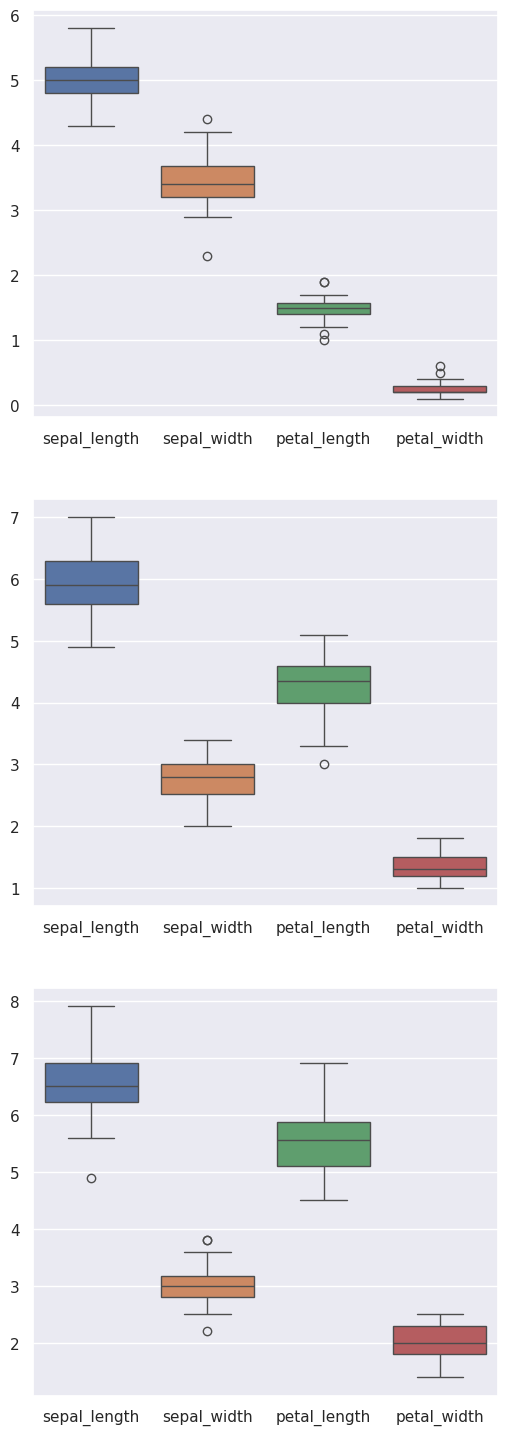

In [48]:
plt.figure(num=1, figsize=(6, 18))
plt.subplot(3,1,1)
sns.boxplot(data=data.groupby(['species']).get_group('setosa').drop('species', axis = 1))
plt.subplot(3,1,2)
sns.boxplot(data=data.groupby(['species']).get_group('versicolor').drop('species', axis = 1))
plt.subplot(3,1,3)
sns.boxplot(data=data.groupby(['species']).get_group('virginica').drop('species', axis = 1))

* Matplotlib 部分

In [26]:
def scatterplots(x1_data, x2_data, y1_data, y2_data, x1_label, x2_label, y1_label, y2_label
                 , st1, st2, st3, st4):

    fig = plt.figure(num=1, figsize=(12, 12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
# 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
# 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
# 而设置整个画布，将是在fig上完成。

# 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax1.scatter(x1_data, y1_data, s = 10, color = '#539caf', alpha = 0.75)
    ax2.scatter(x1_data, y2_data, s = 10, color = '#539caf', alpha = 0.75)
    ax3.scatter(x2_data, y1_data, s = 10, color = '#539caf', alpha = 0.75)
    ax4.scatter(x2_data, y2_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax1.set_title(st1)
    ax1.set_xlabel(x1_label)
    ax1.set_ylabel(y1_label)
    ax2.set_title(st2)
    ax2.set_xlabel(x1_label)
    ax2.set_ylabel(y2_label)
    ax3.set_title(st3)
    ax3.set_xlabel(x2_label)
    ax3.set_ylabel(y1_label)
    ax4.set_title(st4)
    ax4.set_xlabel(x2_label)
    ax4.set_ylabel(y2_label)

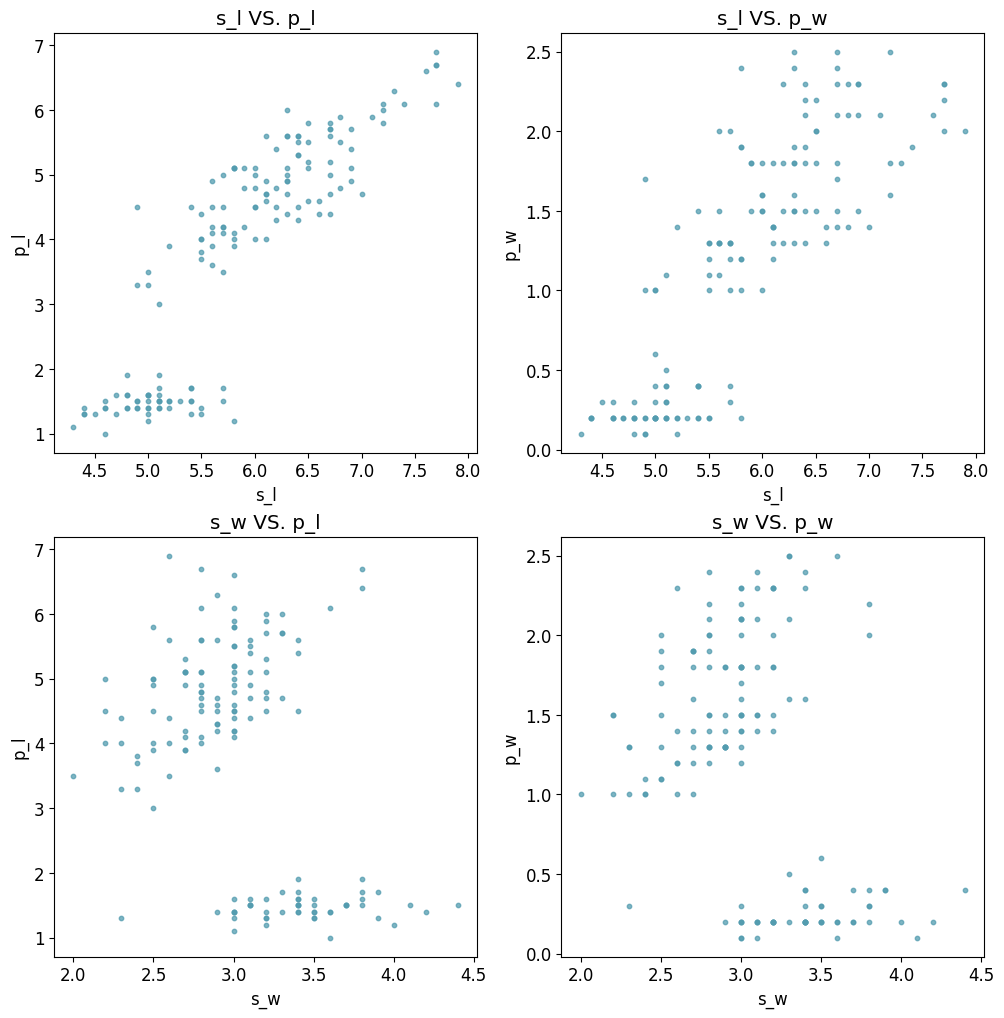

In [27]:
scatterplots(x1_data = data['sepal_length'], x2_data = data['sepal_width']
             , y1_data = data['petal_length'], y2_data = data['petal_width']
             , x1_label = 's_l', x2_label = 's_w', y1_label = 'p_l', y2_label = 'p_w'
             , st1 = 's_l VS. p_l', st2 = 's_l VS. p_w', st3 = 's_w VS. p_l', st4 = 's_w VS. p_w')

In [37]:
def scatterplots(x1_data, x2_data, y1_data, y2_data, x1_label, x2_label, y1_label, y2_label
                 , st1, st2, st3, st4):

    fig = plt.figure(num=1, figsize=(12, 12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
# 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
# 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
# 而设置整个画布，将是在fig上完成。
    color_map = {'setosa':'#539caf', 'versicolor':'#b02027', 'virginica':'#2e20b0'}
    colors = data['species'].map(color_map)

# 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax1.scatter(x1_data, y1_data, s = 10, color = colors, alpha = 0.75)
    ax2.scatter(x1_data, y2_data, s = 10, color = colors, alpha = 0.75)
    ax3.scatter(x2_data, y1_data, s = 10, color = colors, alpha = 0.75)
    ax4.scatter(x2_data, y2_data, s = 10, color = colors, alpha = 0.75)

    # 添加标题和坐标说明
    ax1.set_title(st1)
    ax1.set_xlabel(x1_label)
    ax1.set_ylabel(y1_label)
    ax2.set_title(st2)
    ax2.set_xlabel(x1_label)
    ax2.set_ylabel(y2_label)
    ax3.set_title(st3)
    ax3.set_xlabel(x2_label)
    ax3.set_ylabel(y1_label)
    ax4.set_title(st4)
    ax4.set_xlabel(x2_label)
    ax4.set_ylabel(y2_label)

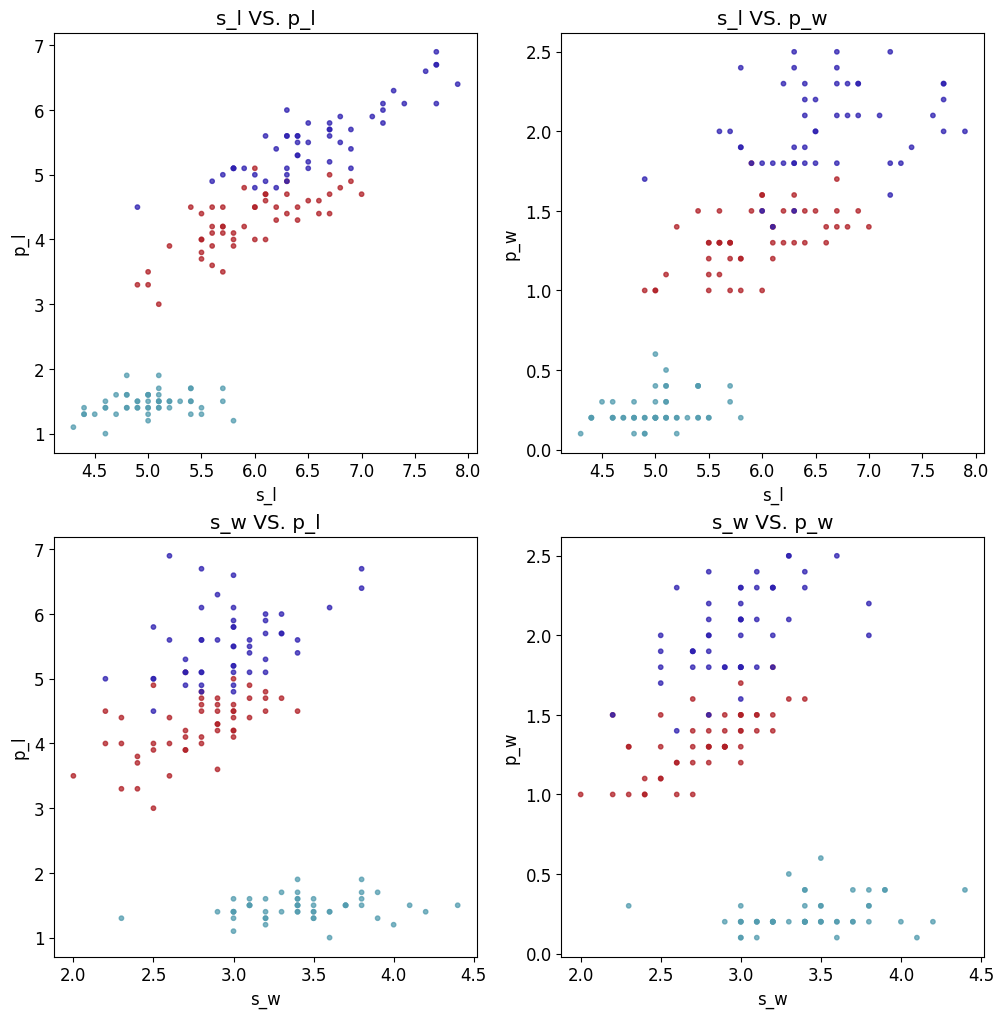

In [38]:
scatterplots(x1_data = data['sepal_length'], x2_data = data['sepal_width']
             , y1_data = data['petal_length'], y2_data = data['petal_width']
             , x1_label = 's_l', x2_label = 's_w', y1_label = 'p_l', y2_label = 'p_w'
             , st1 = 's_l VS. p_l', st2 = 's_l VS. p_w', st3 = 's_w VS. p_l', st4 = 's_w VS. p_w')

In [42]:
species = np.unique(data['species']) 
bp_data = []
for specy in species:
    bp_data.append(data[data['species'] == specy]['sepal_length'].values)
for specy in species:
    bp_data.append(data[data['species'] == specy]['sepal_width'].values)
for specy in species:
    bp_data.append(data[data['species'] == specy]['petal_length'].values)
for specy in species:
    bp_data.append(data[data['species'] == specy]['petal_width'].values)

In [53]:
def boxplots(x_data, y1_data, y2_data, y3_data, x1_label, x2_label, x3_label, y_label
                 , st1, st2, st3):

    fig = plt.figure(num=1, figsize=(6, 18))
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
# 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
# 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
# 而设置整个画布，将是在fig上完成。

# 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax1.boxplot(y1_data, patch_artist = True, medianprops = {'color': '#0a0a0a'},
               boxprops = {'color': '#0a0a0a', 'facecolor': '#d91a30'},
               whiskerprops = {'color': '#ff00f2'}, capprops = {'color': '#0008ff'})
    ax2.boxplot(y2_data, patch_artist = True, medianprops = {'color':'#0a0a0a'},
               boxprops = {'color': '#0a0a0a', 'facecolor': '#d91a30'},
               whiskerprops = {'color': '#ff00f2'}, capprops = {'color': '#0008ff'})
    ax3.boxplot(y3_data, patch_artist = True, medianprops = {'color': '#0a0a0a'},
               boxprops = {'color': '#0a0a0a', 'facecolor': '#d91a30'},
               whiskerprops = {'color': '#ff00f2'}, capprops = {'color': '#0008ff'})

    # 添加标题和坐标说明
    ax1.set_xticklabels(x_data)
    ax1.set_title(st1)
    ax1.set_xlabel(x1_label)
    ax1.set_ylabel(y_label)
    ax2.set_xticklabels(x_data)
    ax2.set_title(st2)
    ax2.set_xlabel(x2_label)
    ax2.set_ylabel(y_label)
    ax3.set_xticklabels(x_data)
    ax3.set_title(st3)
    ax3.set_xlabel(x3_label)
    ax3.set_ylabel(y_label)

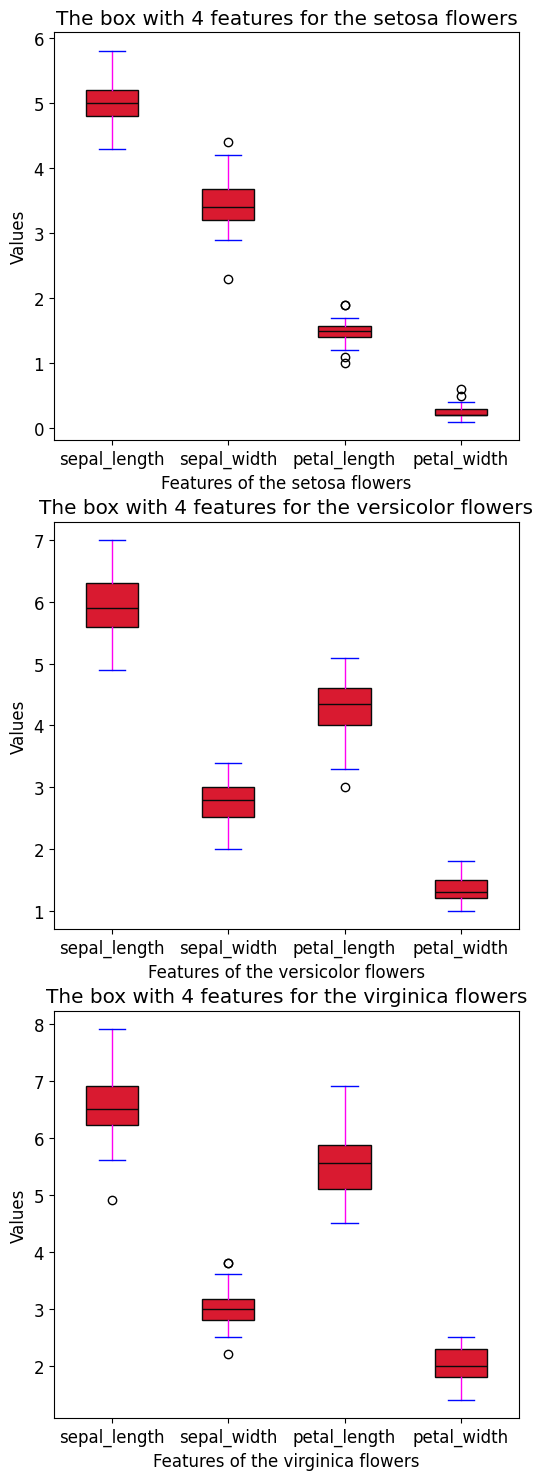

In [54]:
boxplots(x_data = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
         , y1_data = bp_data[::3], y2_data = bp_data[1::3], y3_data = bp_data[2::3]
         , x1_label = 'Features of the setosa flowers', x2_label = 'Features of the versicolor flowers'
         , x3_label = 'Features of the virginica flowers', y_label = 'Values'
         , st1 = 'The box with 4 features for the setosa flowers'
         , st2 = 'The box with 4 features for the versicolor flowers'
         , st3 = 'The box with 4 features for the virginica flowers')

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [49]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* Seaborn 部分

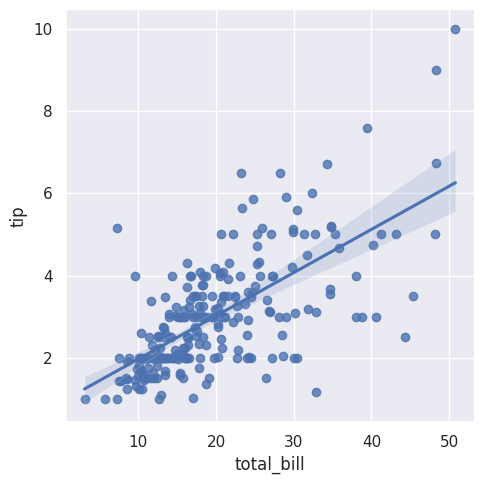

In [50]:
sns.lmplot(x="total_bill", y="tip", data=data)

<Axes: xlabel='sex', ylabel='tip'>

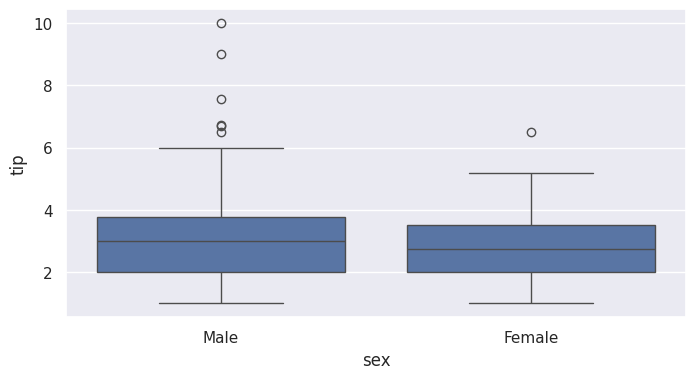

In [51]:
sns.boxplot(data=data, x = 'sex', y = 'tip')

<Axes: xlabel='smoker', ylabel='tip'>

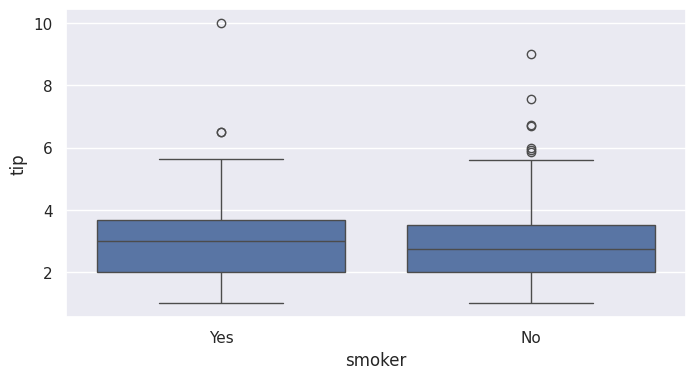

In [52]:
sns.boxplot(data=data, x = 'smoker', y = 'tip')

<Axes: xlabel='day', ylabel='tip'>

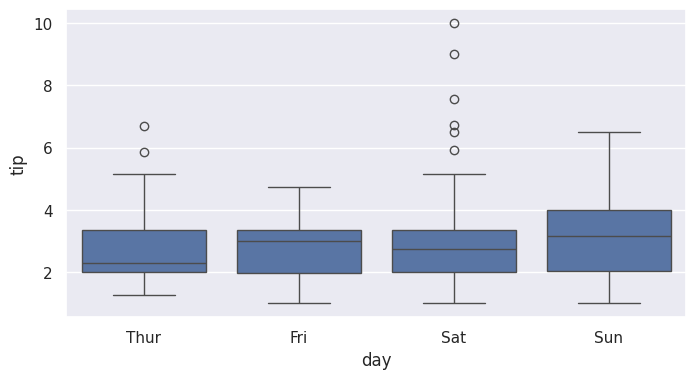

In [53]:
sns.boxplot(data=data, x = 'day', y = 'tip')

<Axes: xlabel='time', ylabel='tip'>

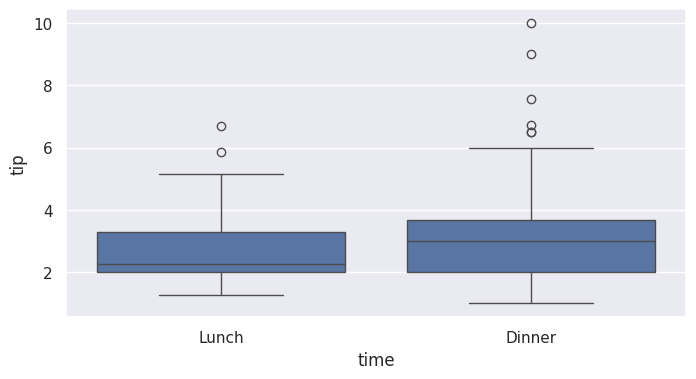

In [54]:
sns.boxplot(data=data, x = 'time', y = 'tip')

<Axes: xlabel='size', ylabel='tip'>

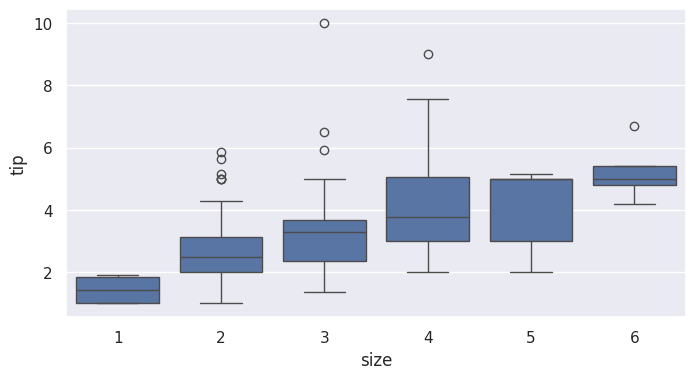

In [55]:
sns.boxplot(data=data, x = 'size', y = 'tip')

<Axes: xlabel='sex', ylabel='tip'>

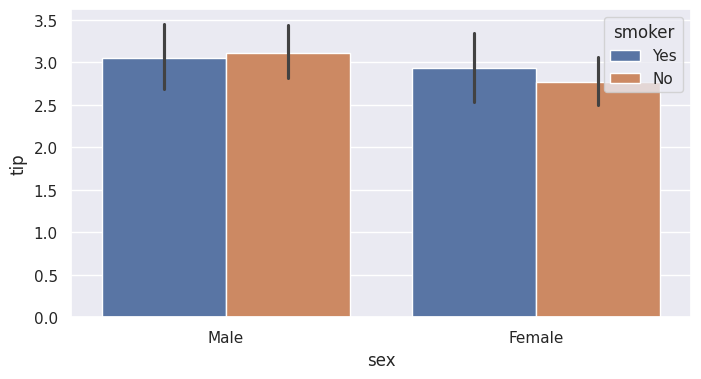

In [56]:
sns.barplot(x="sex", y="tip", hue="smoker", data=data) 

* Matplotlib 部分

In [70]:
def scatterplot31(x_data, y_data, x_label, y_label, title, ax = None):
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

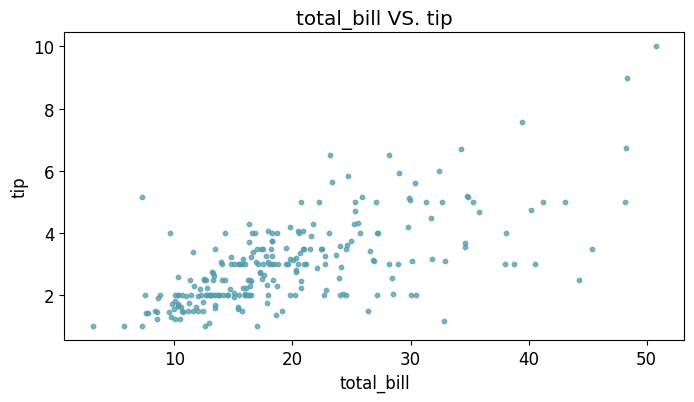

In [71]:
scatterplot31(x_data = data['total_bill'], y_data = data['tip']
             , x_label = 'total_bill', y_label = 'tip', title = 'total_bill VS. tip')

In [68]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(data['total_bill']) # 线性回归增加常数项
y = data['tip']
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, dt, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = dt[:,2]

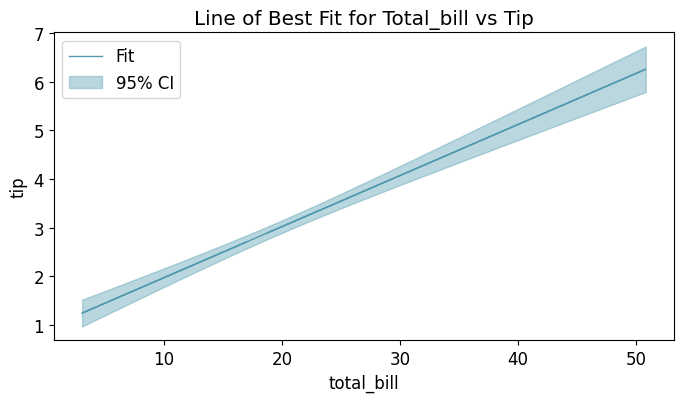

In [74]:
# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = dt[:,4:6].T

# 创建置信区间DataFrame，上下界
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = data['total_bill']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序

def lineplot31(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制拟合曲线，lw=linewidth，alpha=transparancy
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.legend(loc = 'best')
    return ax

ax = lineplot31(x_data = data['total_bill']
        , y_data = fitted_values
        , sorted_x = CI_df['x_data']
        , low_CI = CI_df['low_CI']
        , upper_CI = CI_df['upper_CI']
        , x_label = 'total_bill'
        , y_label = 'tip'
        , title = 'Line of Best Fit for Total_bill vs Tip')

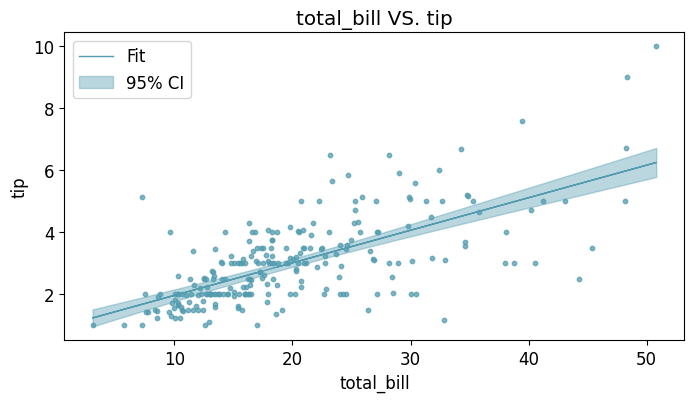

In [76]:
ax = lineplot31(x_data = data['total_bill']
        , y_data = fitted_values
        , sorted_x = CI_df['x_data']
        , low_CI = CI_df['low_CI']
        , upper_CI = CI_df['upper_CI']
        , x_label = 'total_bill'
        , y_label = 'tip'
        , title = 'Line of Best Fit for Total_bill vs Tip')

scatterplot31(x_data = data['total_bill'], y_data = data['tip']
             , x_label = 'total_bill', y_label = 'tip', title = 'total_bill VS. tip', ax = ax)

In [79]:
sex = np.unique(data['sex']) 
bp32_data = []
for s in sex:
    bp32_data.append(data[data['sex'] == s]['tip'].values)
    
def boxplot3(x_data, y_data, x_label, y_label, title):

    _, ax = plt.subplots()

    ax.boxplot(y_data, patch_artist = True, medianprops = {'color': '#0a0a0a'},
               boxprops = {'color': '#0a0a0a', 'facecolor': '#d91a30'},
               whiskerprops = {'color': '#ff00f2'}, capprops = {'color': '#0008ff'})

    # 添加标题和坐标说明
    ax.set_xticklabels(x_data)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

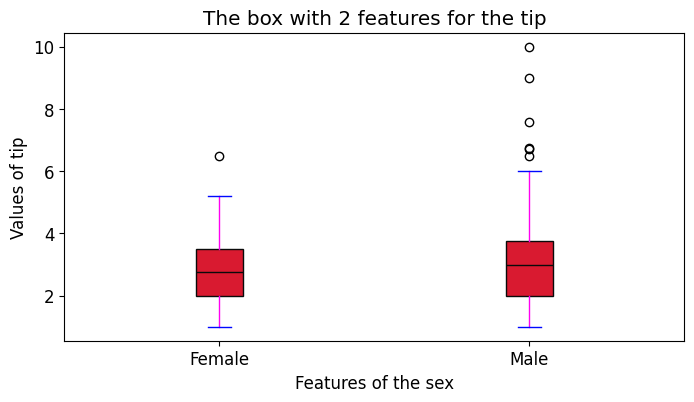

In [83]:
boxplot3(x_data = ['Female','Male'], y_data = bp32_data, x_label = 'Features of the sex', y_label = 'Values of tip'
         , title = 'The box with 2 features for the tip')

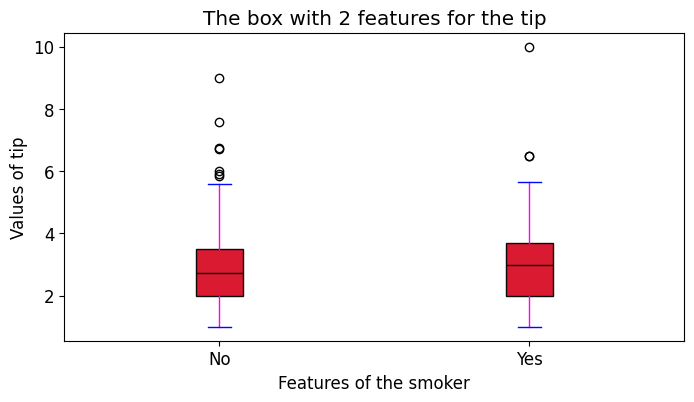

In [84]:
smoke = np.unique(data['smoker']) 
bp33_data = []
for s in smoke:
    bp33_data.append(data[data['smoker'] == s]['tip'].values)
    
boxplot3(x_data = smoke, y_data = bp33_data, x_label = 'Features of the smoker', y_label = 'Values of tip'
         , title = 'The box with 2 features for the tip')

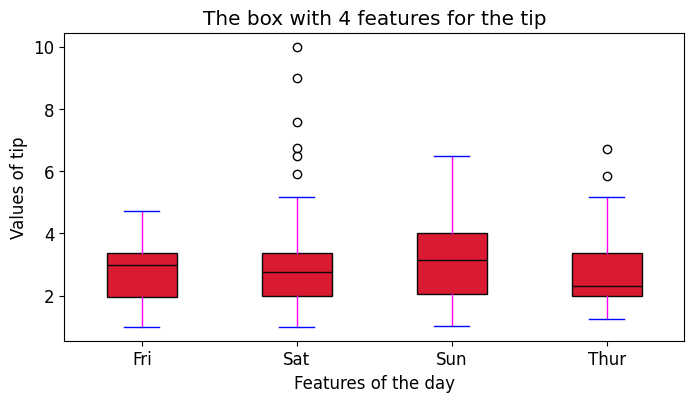

In [85]:
Day = np.unique(data['day']) 
bp34_data = []
for d in Day:
    bp34_data.append(data[data['day'] == d]['tip'].values)
    
boxplot3(x_data = Day, y_data = bp34_data, x_label = 'Features of the day', y_label = 'Values of tip'
         , title = 'The box with 4 features for the tip')

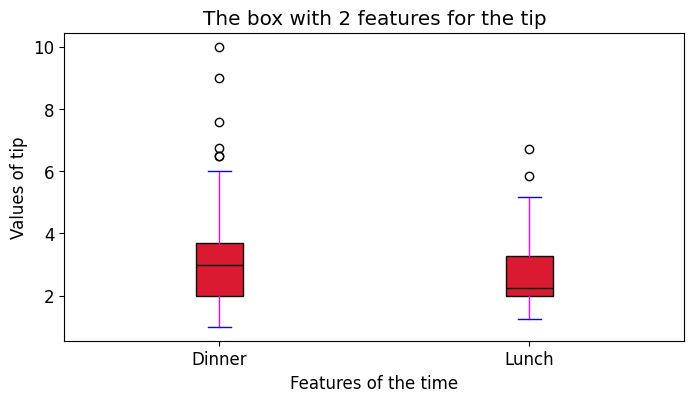

In [87]:
Time = np.unique(data['time']) 
bp35_data = []
for t in Time:
    bp35_data.append(data[data['time'] == t]['tip'].values)
    
boxplot3(x_data = Time, y_data = bp35_data, x_label = 'Features of the time', y_label = 'Values of tip'
         , title = 'The box with 2 features for the tip')

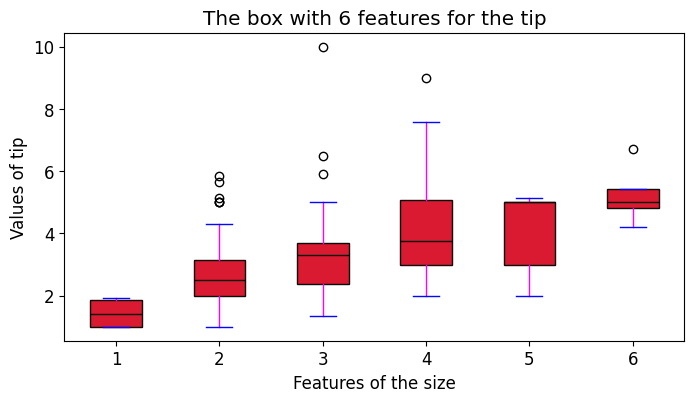

In [88]:
Size = np.unique(data['size']) 
bp36_data = []
for s in Size:
    bp36_data.append(data[data['size'] == s]['tip'].values)
    
boxplot3(x_data = Size, y_data = bp36_data, x_label = 'Features of the size', y_label = 'Values of tip'
         , title = 'The box with 6 features for the tip')

In [190]:
mean_sex = data[['smoker', 'tip', 'sex']].groupby(['smoker', 'sex']).mean()

def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)
    x = list(range(len(x_data)))
    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks([0,1])
    plt.xticks([0,1],x_data)
    ax.legend(loc = 'upper right')

/tmp/ipykernel_79/673898560.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sex = data[['smoker', 'tip', 'sex']].groupby(['smoker', 'sex']).mean()


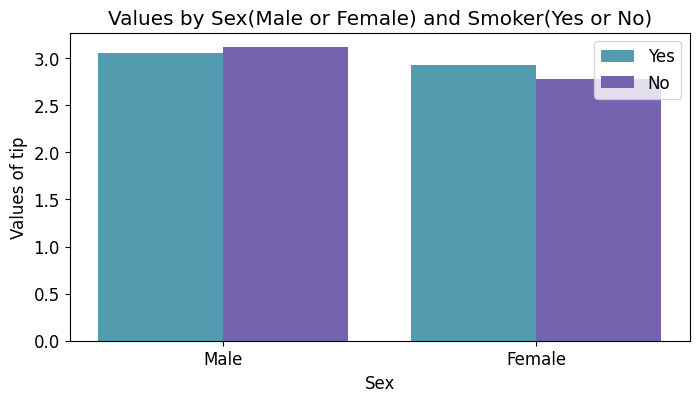

In [191]:
groupedbarplot(x_data = ['Male','Female']
               , y_data_list = [mean_sex.loc['Yes']['tip'], mean_sex.loc['No']['tip']]
               , y_data_names = ['Yes', 'No']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Values of tip'
               , title = 'Values by Sex(Male or Female) and Smoker(Yes or No)')

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [57]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
data = data.drop(['class', 'embark_town', 'who', 'alive'], axis = 1)

In [59]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,True,NaN,True


* Seaborn 部分

In [98]:
survived_p = data[['survived', 'pclass']].groupby(['pclass']).sum()
total_p = data[['survived', 'pclass']].groupby(['pclass']).count()
survived_pro = survived_p/total_p
unsurvived_pro = 1 - survived_pro
unsurvived_pro.columns=['unsurvived']
surv=pd.concat([survived_pro,unsurvived_pro],axis=1)

<Axes: ylabel='survived'>

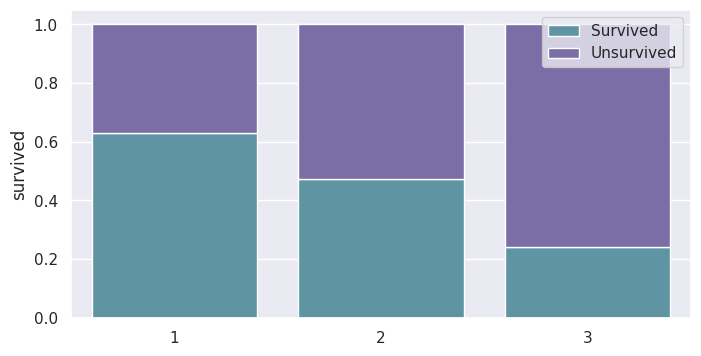

In [105]:
sns.barplot(data=surv, x=[1,2,3], y='survived', color='#539caf', label='Survived')
sns.barplot(data=surv, x=[1,2,3], y='unsurvived', color='#7663b0', label='Unsurvived', bottom=surv['survived'])

In [106]:
survived_sex = data[['survived', 'sex']].groupby(['sex']).sum()
total_sex = data[['survived', 'sex']].groupby(['sex']).count()
survived_pro_sex = survived_sex/total_sex
unsurvived_pro_sex = 1 - survived_pro_sex
unsurvived_pro_sex.columns=['unsurvived']
surv_sex=pd.concat([survived_pro_sex,unsurvived_pro_sex],axis=1)

<Axes: ylabel='survived'>

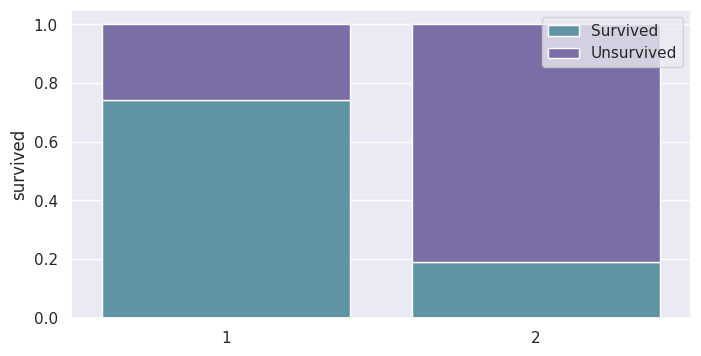

In [109]:
sns.barplot(data=surv_sex, x=[1,2], y='survived', color='#539caf', label='Survived')
sns.barplot(data=surv_sex, x=[1,2], y='unsurvived', color='#7663b0', label='Unsurvived', bottom=surv_sex['survived'])

<Axes: xlabel='survived', ylabel='fare'>

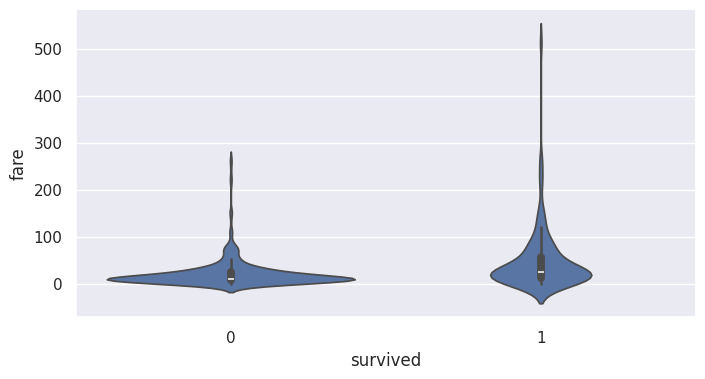

In [110]:
sns.violinplot(x="survived", y="fare", data=data)

<Axes: xlabel='survived', ylabel='age'>

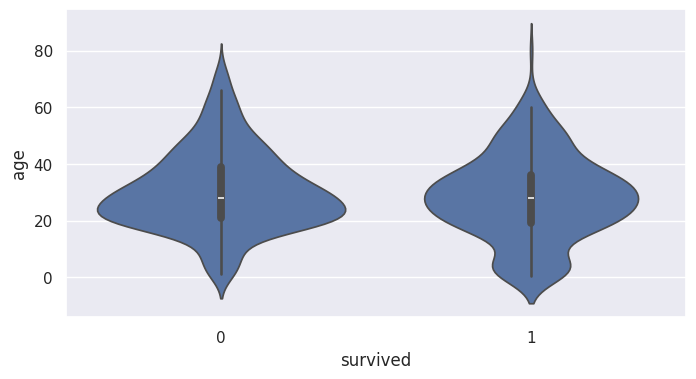

In [111]:
sns.violinplot(x="survived", y="age", data=data)

In [113]:
Embarked_p = data[['embarked', 'pclass', 'survived']].groupby(['pclass', 'embarked']).count()

<Axes: xlabel='embarked', ylabel='survived'>

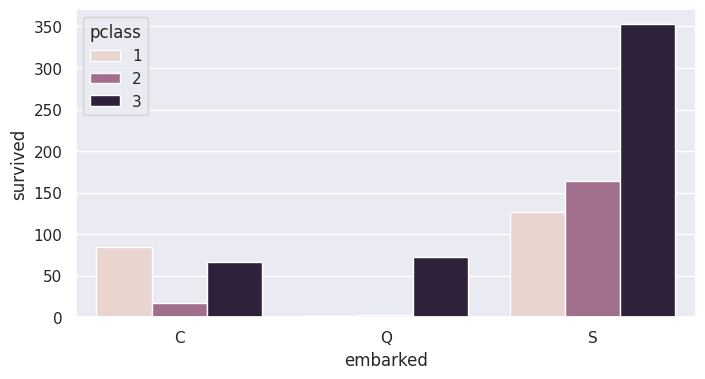

In [115]:
sns.barplot(x="embarked", y="survived", hue="pclass", data=Embarked_p) 

<Axes: xlabel='survived', ylabel='sibsp'>

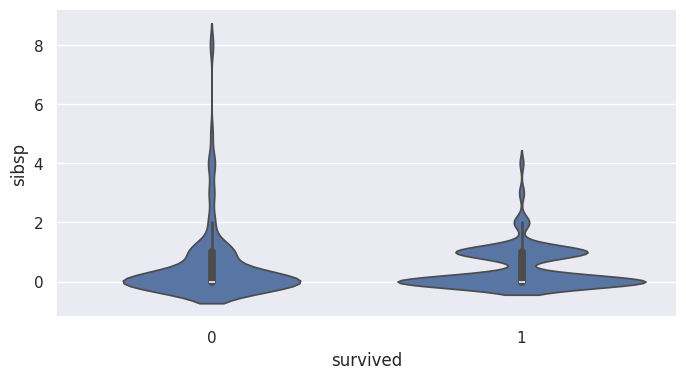

In [116]:
sns.violinplot(x="survived", y="sibsp", data=data)

<Axes: xlabel='survived', ylabel='parch'>

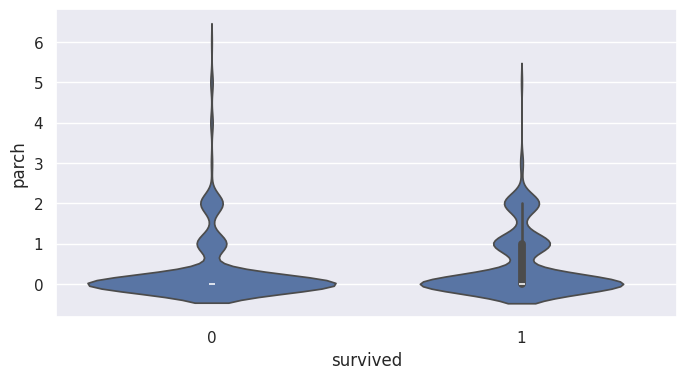

In [117]:
sns.violinplot(x="survived", y="parch", data=data)

<Axes: xlabel='alone', ylabel='embarked'>

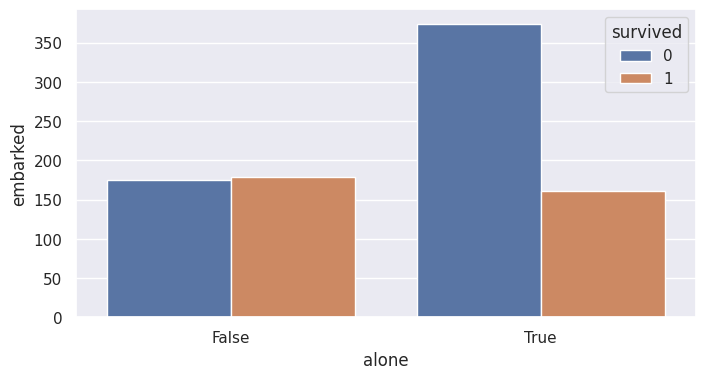

In [120]:
Alone_p = data[['embarked', 'survived', 'alone']].groupby(['survived', 'alone']).count()
sns.barplot(x="alone", y="embarked", hue="survived", data=Alone_p) 

* Matplotlib 部分

In [235]:
survived_p = data[['survived', 'pclass']].groupby(['pclass']).sum()
total_p = data[['survived', 'pclass']].groupby(['pclass']).count()
survived_pro = survived_p/total_p
unsurvived_pro = 1 - survived_pro

In [268]:
def stackedbarplot4(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    x = [j for j in range(len(x_data))]
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks(x)
    plt.xticks(x,x_data)
    ax.legend(loc = 'upper right') # 设定图例位置

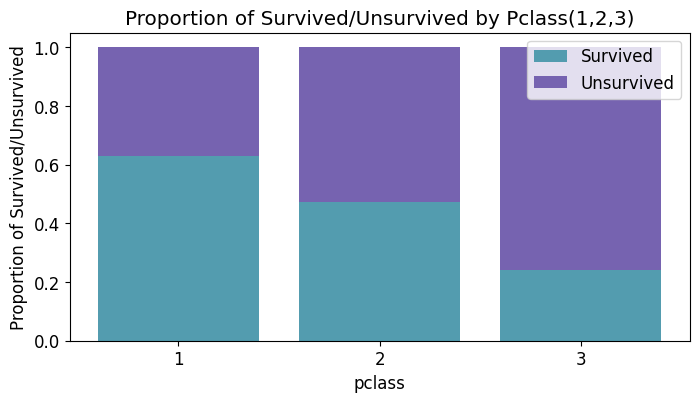

In [269]:
stackedbarplot4(x_data = ['1','2','3']
               , y_data_list = [survived_pro['survived'], 1-survived_pro['survived']]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'pclass'
               , y_label = 'Proportion of Survived/Unsurvived'
               , title = 'Proportion of Survived/Unsurvived by Pclass(1,2,3)')

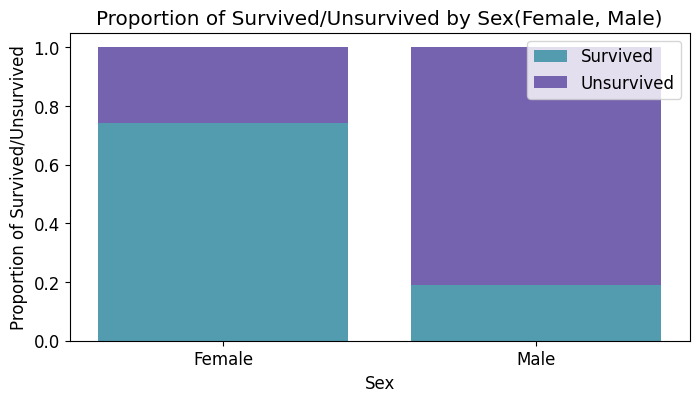

In [270]:
survived_sex = data[['survived', 'sex']].groupby(['sex']).sum()
total_sex = data[['survived', 'sex']].groupby(['sex']).count()
survived_pro_sex = survived_sex/total_sex
unsurvived_pro_sex = 1 - survived_pro_sex

stackedbarplot4(x_data = ['Female', 'Male']
               , y_data_list = [survived_pro_sex['survived'], unsurvived_pro_sex['survived']]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Proportion of Survived/Unsurvived'
               , title = 'Proportion of Survived/Unsurvived by Sex(Female, Male)')

In [38]:
sur = np.unique(data['survived']) 
bp43_data = []
for s in sur:
    bp43_data.append(data[data['survived'] == s]['fare'].values)
    
def violinplot4(x_data, y_data, x_label, y_label, title):

    _, ax = plt.subplots()
    x = [i+1 for i in range(len(x_data))]
    
    part = ax.violinplot(y_data, vert = True, showmeans = False,
               showextrema = True, showmedians = True)
    
    # 颜色设置
    for pc in part['bodies']:
        print(pc)
        pc.set_facecolor('#ed7b09')
        pc.set_edgecolor('#000000')
        pc.set_alpha(1)
        pc.set_linestyle('--')
    
    # 添加标题和坐标说明
    ax.set_xticklabels(x)
    plt.xticks(x,x_data)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

/tmp/ipykernel_85/425630934.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x)


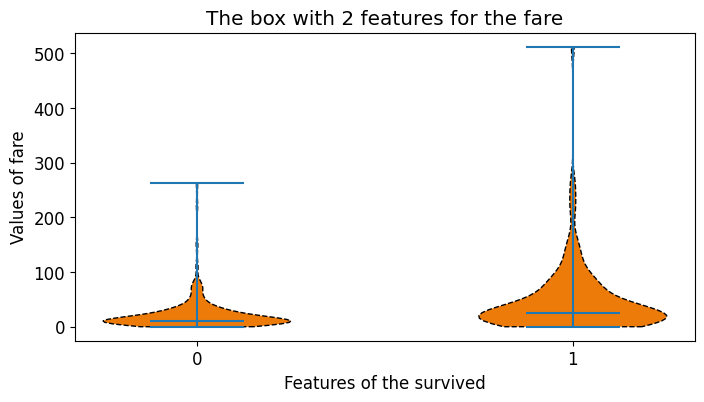

In [39]:
violinplot4(x_data = sur, y_data = bp43_data, x_label = 'Features of the survived'
            , y_label = 'Values of fare', title = 'The box with 2 features for the fare')

/tmp/ipykernel_85/425630934.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x)


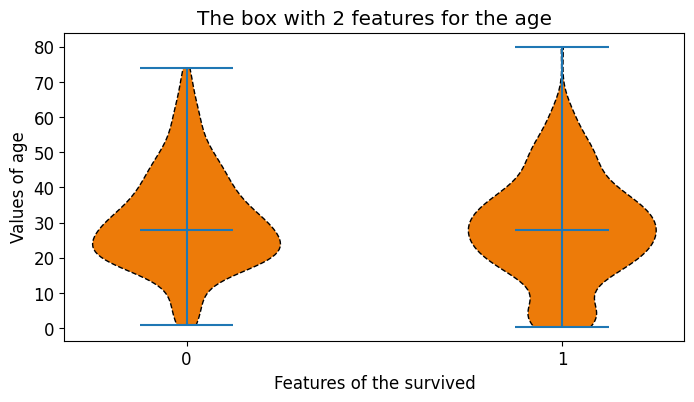

In [59]:
bp44_data = []
for s in sur:
    bp44_data.append(data[data['survived'] == s]['age'].values)
    
# 去除 nan 数据
import cmath as mt
bp44_data[0] = [i for i in bp44_data[0] if not mt.isnan(i)]
bp44_data[1] = [i for i in bp44_data[1] if not mt.isnan(i)]

violinplot4(x_data = sur, y_data = bp44_data, x_label = 'Features of the survived'
            , y_label = 'Values of age', title = 'The box with 2 features for the age')

In [72]:
Embarked_p = data[['embarked', 'pclass', 'survived']].groupby(['pclass', 'embarked']).count()

In [91]:
def groupedbarplot4(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)
    x = list(range(len(x_data)))
    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.set_xticks([j for j in range(len(y_data_list))])
    plt.xticks([j for j in range(len(y_data_list))], x_data)
    ax.legend(loc = 'upper left')

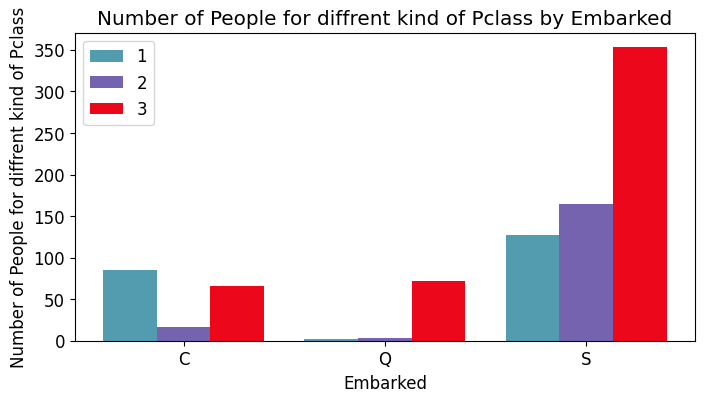

In [92]:
groupedbarplot4(x_data = ['C','Q','S']
               , y_data_list = [Embarked_p.loc[1]['survived'], Embarked_p.loc[2]['survived'],Embarked_p.loc[3]['survived']]
               , y_data_names = ['1', '2', '3']
               , colors = ['#539caf', '#7663b0', '#ed071a']
               , x_label = 'Embarked'
               , y_label = 'Number of People for diffrent kind of Pclass'
               , title = 'Number of People for diffrent kind of Pclass by Embarked')

In [87]:
bp46_data = []
for s in sur:
    bp46_data.append(data[data['survived'] == s]['sibsp'].values)

/tmp/ipykernel_85/425630934.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x)


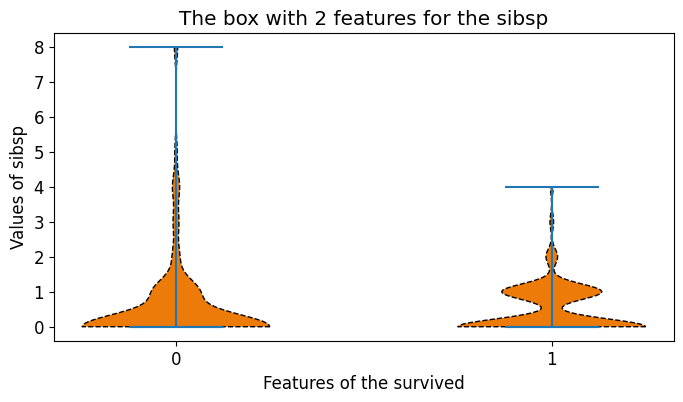

In [88]:
violinplot4(x_data = sur, y_data = bp46_data, x_label = 'Features of the survived'
            , y_label = 'Values of sibsp', title = 'The box with 2 features for the sibsp')

In [89]:
bp47_data = []
for s in sur:
    bp47_data.append(data[data['survived'] == s]['parch'].values)

/tmp/ipykernel_85/425630934.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x)


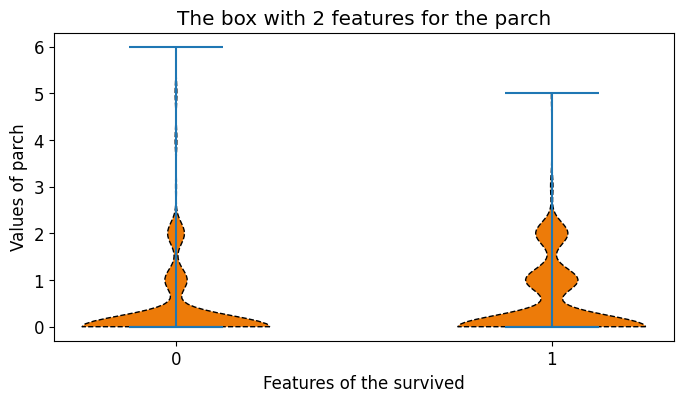

In [90]:
violinplot4(x_data = sur, y_data = bp47_data, x_label = 'Features of the survived'
            , y_label = 'Values of parch', title = 'The box with 2 features for the parch')

In [101]:
Alone_p = data[['embarked', 'survived', 'alone']].groupby(['survived', 'alone']).count()

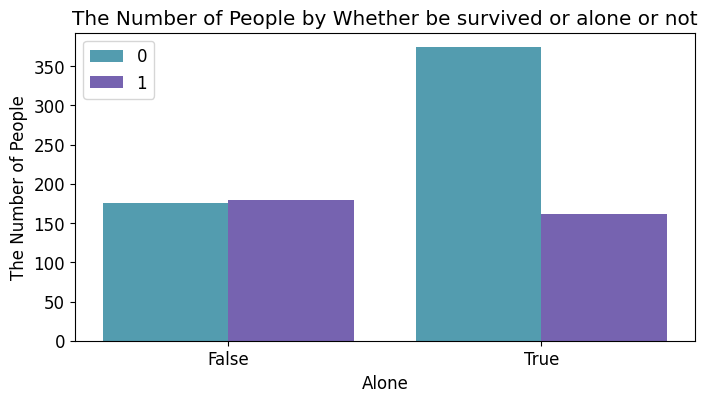

In [102]:
groupedbarplot4(x_data = ['False','True']
               , y_data_list = [Alone_p.loc[0]['embarked'], Alone_p.loc[1]['embarked']]
               , y_data_names = ['0', '1']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Alone'
               , y_label = 'The Number of People'
               , title = 'The Number of People by Whether be survived or alone or not')